In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix gmaps

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lams = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lams, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 9 of Set 4 | kulunda
Processing Record 10 of Set 4 | bintulu
Processing Record 11 of Set 4 | jesus carranza
Processing Record 12 of Set 4 | along
Processing Record 13 of Set 4 | bluff
Processing Record 14 of Set 4 | fairbanks
Processing Record 15 of Set 4 | kjollefjord
Processing Record 16 of Set 4 | iquitos
Processing Record 17 of Set 4 | wamba
Processing Record 18 of Set 4 | bilibino
Processing Record 19 of Set 4 | straumen
Processing Record 20 of Set 4 | kruisfontein
Processing Record 21 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 22 of Set 4 | longyearbyen
Processing Record 23 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 24 of Set 4 | nikolskoye
Processing Record 25 of Set 4 | pacific grove
Processing Record 26 of Set 4 | bonthe
Processing Record 27 of Set 4 | taltal
Processing Record 28 of Set 4 | laela
Processing Record 29 of Set 4 | racine
Processing Record 30 of Set 4 | mount isa
Processing Record 31 of Set 4 | beng

In [6]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,8.89,91,100,1.50,GL,2020-11-25 00:36:13
1,Arman,59.70,150.17,2.44,84,0,7.96,RU,2020-11-25 00:36:13
2,Bethel,41.37,-73.41,36.00,80,1,3.36,US,2020-11-25 00:36:13
3,Vaini,-21.20,-175.20,82.40,78,75,9.17,TO,2020-11-25 00:36:13
4,Mehamn,71.04,27.85,29.82,94,100,12.86,NO,2020-11-25 00:36:14
5,Coleraine,55.13,-6.67,46.40,93,40,8.05,GB,2020-11-25 00:35:16
6,Cabedelo,-6.98,-34.83,77.00,88,20,6.93,BR,2020-11-25 00:25:54
7,Sao Joao Da Barra,-21.64,-41.05,72.63,86,98,9.73,BR,2020-11-25 00:23:26
8,Kismayo,-0.36,42.55,79.43,84,0,7.87,SO,2020-11-25 00:34:19
9,Ushuaia,-54.80,-68.30,44.60,65,75,6.93,AR,2020-11-25 00:31:15


In [8]:
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-11-25 00:36:13,77.48,-69.36,8.89,91,100,1.50
1,Arman,RU,2020-11-25 00:36:13,59.70,150.17,2.44,84,0,7.96
2,Bethel,US,2020-11-25 00:36:13,41.37,-73.41,36.00,80,1,3.36
3,Vaini,TO,2020-11-25 00:36:13,-21.20,-175.20,82.40,78,75,9.17
4,Mehamn,NO,2020-11-25 00:36:14,71.04,27.85,29.82,94,100,12.86
...,...,...,...,...,...,...,...,...,...
564,Hambantota,LK,2020-11-25 00:38:12,6.12,81.12,75.20,100,20,3.36
565,South Venice,US,2020-11-25 00:38:12,27.05,-82.42,73.99,60,90,8.05
566,Zyryanka,RU,2020-11-25 00:38:12,65.75,150.85,-1.53,91,100,17.05
567,Talnakh,RU,2020-11-25 00:37:03,69.49,88.40,15.80,92,75,15.66


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

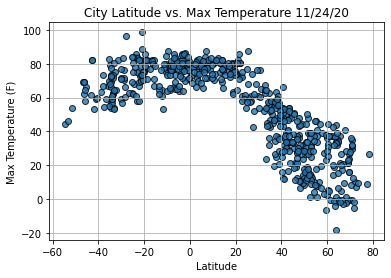

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Max_temps.png")

# Show plot.
plt.show()

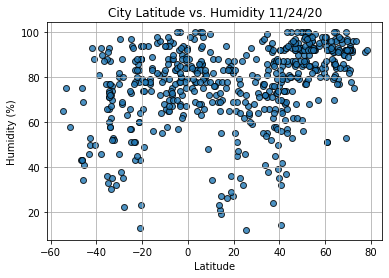

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Humidity.png")
# Show plot.
plt.show()

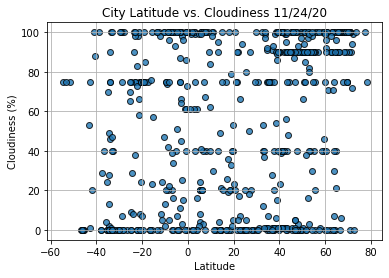

In [13]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Cloudiness.png")
# Show plot.
plt.show()

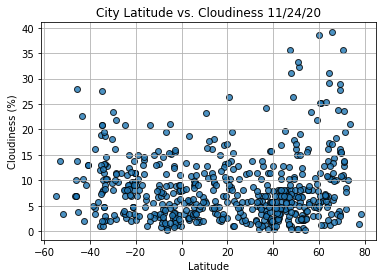

In [14]:
# Build the scatter plots for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/wind_speed.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()  

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

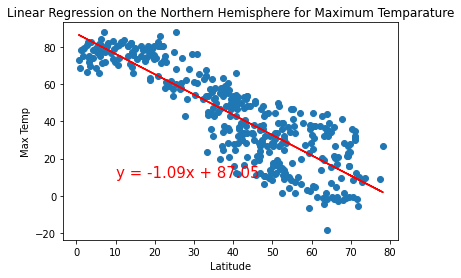

In [17]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temparature', 'Max Temp',(10,10))

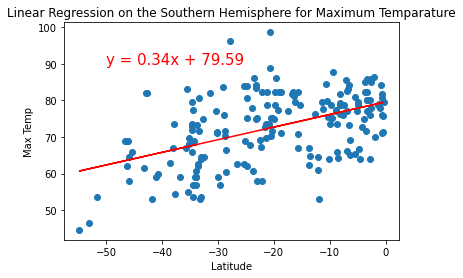

In [18]:
#Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temparature', 'Max Temp',(-50,90))

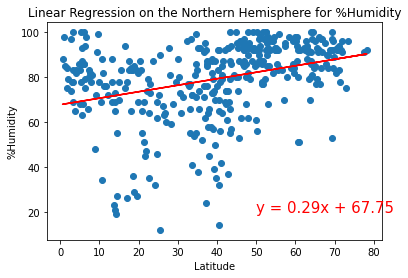

In [19]:
#Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere for %Humidity','%Humidity', (50,20))

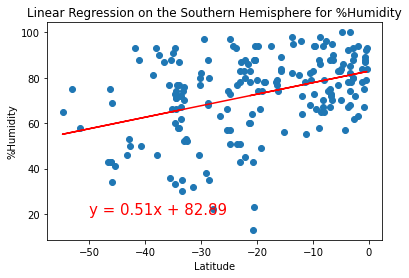

In [20]:
#Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere for %Humidity','%Humidity', (-50,20))

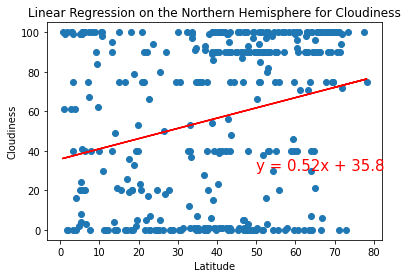

In [21]:
#Linear regression on the Northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere for Cloudiness','Cloudiness', (50,30))

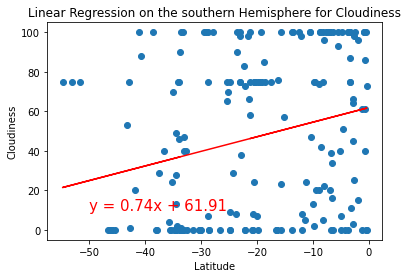

In [22]:
#Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the southern Hemisphere for Cloudiness','Cloudiness', (-50,10))

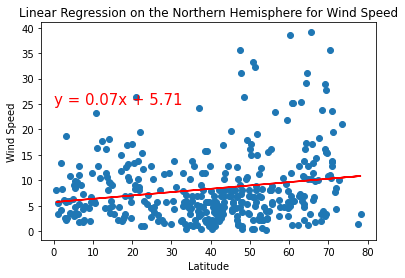

In [23]:
#Linear regression on the Northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere for Wind Speed','Wind Speed', (0,25))

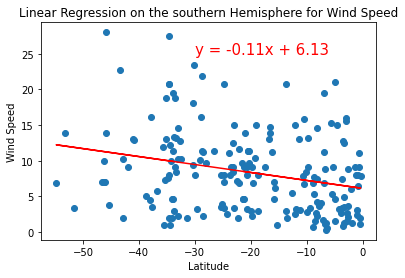

In [24]:
#Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the southern Hemisphere for Wind Speed','Wind Speed', (-30,25))